In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

pd.options.mode.use_inf_as_na = True
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
BASEDIR = os.path.dirname(os.path.dirname(os.path.abspath('README.md')))
DATAPATH = os.path.join(BASEDIR, 'data')


In [4]:
df = pd.read_csv(os.path.join(DATAPATH, 'car_ads_fuse.csv'))
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,seat,leon,178000.0,2000.0,1390.0,55.0,NaN,NaN,None,man,4,5,gasoline,2016-01-03 19:42:48.205853+00:00,2016-01-07 00:56:35.766128+00:00,2500.30
1,NaN,NaN,135000.0,2007.0,1149.0,55.0,NaN,NaN,None,man,4,5,gasoline,2015-12-08 08:46:03.020179+00:00,2016-01-18 19:02:24.218185+00:00,2980.24
2,audi,NaN,138000.0,2005.0,1984.0,147.0,other,NaN,NaN,man,4.0,5.0,NaN,2016-03-05 22:09:11.127858+00:00,2016-07-03 17:39:48.838084+00:00,8010.25
3,fiat,punto,105000.0,2009.0,NaN,NaN,NaN,NaN,None,NaN,None,None,gasoline,2015-12-12 19:48:16.546082+00:00,2016-01-02 10:02:05.676711+00:00,2300.26
4,opel,vectra,129385.0,2003.0,NaN,NaN,NaN,NaN,None,NaN,None,None,gasoline,2016-01-01 17:28:46.527414+00:00,2016-01-17 22:49:09.853789+00:00,2800.30


# Variable Identification


## 1. What does each column represent?

To better understand what does each column represents, we are analysing the domain and creating a data dictionary to describe what each column in the dataset represents.

In [5]:
data_desc = {
    'maker': 'normalized all lowercase',
    "model" : "normalized all lowercase",
    "mileage" : "mileage in KM",
    "manufacture_year": "manufacture year",
    "engine_displacement" : "engine displacement in ccm",
    "engine_power" : "engine_power in kW",
    "body_type" : "almost never present, but I scraped only personal cars, no motorcycles or utility vehicles",
    "color_slug" : "also almost never present",
    "stk_year" : "year of the last emission control",
    "transmission" : "transmission automatic or manual",
    "door_count" : "door counts",
    "seat_count" : "seat counts",
    "fuel_type" : "gasoline, diesel, cng, lpg, electric",
    "date_created" : "when the ad was scraped",
    "datelastseen" : "when the ad was last seen. Our policy was to remove all ads older than 60 days",
    "price_eur" : "list price converted to EUR"
}

## Data Dictionary

data_dictionary = pd.DataFrame(data_desc.items(), columns=['Names', 'Descriptions'])
data_dictionary

,Names,Descriptions
0,maker,normalized all lowercase
1,model,normalized all lowercase
2,mileage,mileage in KM
3,manufacture_year,manufacture year
4,engine_displacement,engine displacement in ccm
5,engine_power,engine_power in kW
6,body_type,"almost never present, but I scraped only perso..."
7,color_slug,also almost never present
8,stk_year,year of the last emission control
9,transmission,transmission automatic or manual


## 2. What are the datatypes?

Here we are analysing if our data are of object or numerical type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                171819 non-null  object 
 1   model                137956 non-null  object 
 2   mileage              182252 non-null  float64
 3   manufacture_year     181223 non-null  float64
 4   engine_displacement  159210 non-null  float64
 5   engine_power         170868 non-null  float64
 6   body_type            136005 non-null  object 
 7   color_slug           12240 non-null   object 
 8   stk_year             102359 non-null  object 
 9   transmission         160413 non-null  object 
 10  door_count           164243 non-null  object 
 11  seat_count           156800 non-null  object 
 12  fuel_type            94681 non-null   object 
 13  date_created         200000 non-null  object 
 14  date_last_seen       200000 non-null  object 
 15  price_eur        

# Data Cleaning

## Missing values identification

Here we are identifying the % of missing values from each column

In [7]:
df.isna().sum()/ len(df) * 100

maker                  14.0905
model                  31.0220
mileage                 8.8740
manufacture_year        9.3885
engine_displacement    20.3950
engine_power           14.5660
body_type              31.9975
color_slug             93.8800
stk_year               48.8205
transmission           19.7935
door_count             17.8785
seat_count             21.6000
fuel_type              52.6595
date_created            0.0000
date_last_seen          0.0000
price_eur               0.0000
dtype: float64

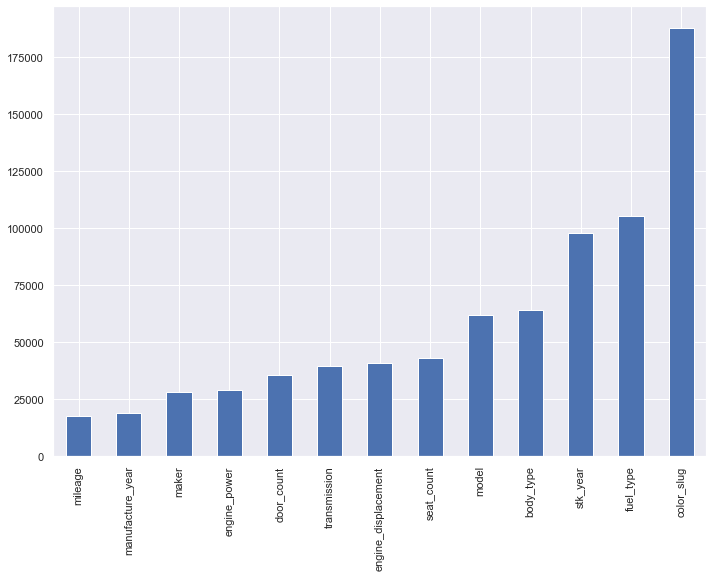

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## Missing values treatment - initial

As we saw above, we have alot of missing values from many columns. Some columns have very high % of missing values so, we are removing columns which has missing values more then 32%.

In [9]:
df = df.loc[:, df.isna().sum()/ len(df) * 100 < 32]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                171819 non-null  object 
 1   model                137956 non-null  object 
 2   mileage              182252 non-null  float64
 3   manufacture_year     181223 non-null  float64
 4   engine_displacement  159210 non-null  float64
 5   engine_power         170868 non-null  float64
 6   body_type            136005 non-null  object 
 7   transmission         160413 non-null  object 
 8   door_count           164243 non-null  object 
 9   seat_count           156800 non-null  object 
 10  date_created         200000 non-null  object 
 11  date_last_seen       200000 non-null  object 
 12  price_eur            200000 non-null  float64
dtypes: float64(5), object(8)
memory usage: 19.8+ MB


## Utils

Utility functions to automate few things.

In [10]:
# from sklearn.impute import KNNImputer, SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# # Simple Imputer
# cat_imputer = SimpleImputer(strategy="most_frequent")
# num_imputer = SimpleImputer(strategy="mean")

# ## Label Encoder
# encoder = LabelEncoder()

In [11]:
# ## Categorical values with null encoder

# def categorical_encoder(col):
#     original = df[col]
#     mask = df[col].isnull()
#     df[col] = encoder.fit_transform(df[col].astype('str'))
#     return df[col].where(~mask, original)
    

## Categorical Encoding

In [12]:
# df['maker'] = categorical_encoder('maker')
# df['model'] = categorical_encoder('model')
# df['transmission'] = categorical_encoder('transmission')
# df['body_type'] = categorical_encoder('body_type')

IF we were to use some imputer from sklearn, it is required for data to be in numerical format. The above code helps is categorical encoding.

Door counts and seat counts has `None` values so we are replacing them with nan to perform `fillna` in future.

In [13]:
df['door_count'].replace('None', np.nan, inplace=True)
df['seat_count'].replace('None', np.nan, inplace=True)


In [14]:
df['door_count'] = df['door_count'].astype('float')
df['seat_count'] = df['seat_count'].astype('float')

## Handeling unnecessary data

We are dropping the `date_created` and `date_last_seen` column. They are related to scraping so.

In [15]:
df = df.drop(['date_created', 'date_last_seen'], axis=1)

In [16]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,seat,leon,178000.0,2000.0,1390.0,55.0,NaN,man,4.0,5.0,2500.30
1,NaN,NaN,135000.0,2007.0,1149.0,55.0,NaN,man,4.0,5.0,2980.24
2,audi,NaN,138000.0,2005.0,1984.0,147.0,other,man,4.0,5.0,8010.25
3,fiat,punto,105000.0,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,2300.26
4,opel,vectra,129385.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,2800.30


In [17]:
new_df = df.copy()

# Outlier Identification & Treatment

We are going to use some domain knowledge to find outliers on categorical data.

## Door counts

In [18]:
new_df['door_count'].unique()

array([ 4., nan,  5.,  2.,  3.,  0.,  6.,  1.,  7., 49.,  8., 77.])

In [19]:
# removing data which has door_count more than 8

new_df = new_df.drop(new_df[new_df['door_count']  >= 8].index)

## Seat Counts

In [20]:
new_df['seat_count'].unique()

array([  5.,  nan,   4.,   3.,   7.,   9.,   2.,   0.,   8.,   6.,   1.,
        13.,  14.,  17.,  20.,  19.,  44.,  58.,  10.,  45.,  85.,  55.,
        12., 512.,  50.])

In [21]:
# removing data which has seat_count more than 9

new_df = new_df.drop(new_df[new_df['seat_count']  >= 9].index)

## Mileage

In [22]:
len(new_df[new_df['mileage']  < 25])

21136

In [23]:
# removing data which has mileage less than 25


new_df = new_df.drop(new_df[new_df['mileage']  <25].index)

## MFG year

In [24]:
# removing data which has manufacture_year less than 1900

new_df = new_df.drop(new_df[new_df['manufacture_year'] <1900].index, axis=0)
# new_df['manufacture_year'].fillna(method='ffill', inplace=True)
new_df = new_df.drop('manufacture_year', axis=1)

# Preview - After removing categorical outliers

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176477 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                151835 non-null  object 
 1   model                120719 non-null  object 
 2   mileage              159227 non-null  float64
 3   engine_displacement  142311 non-null  float64
 4   engine_power         150819 non-null  float64
 5   body_type            120940 non-null  object 
 6   transmission         139566 non-null  object 
 7   door_count           124024 non-null  float64
 8   seat_count           115114 non-null  float64
 9   price_eur            176477 non-null  float64
dtypes: float64(6), object(4)
memory usage: 14.8+ MB


# Missing data handling

Here we are manually imputing all the data from mode is it is categorical and mean if it is numerical.

In [26]:

# If we are to use sklearn imputer

# X = imputer.fit_transform(new_df)

## Maker

In [27]:
new_df['maker'].isna().sum()

24642

In [28]:
new_df['maker'].fillna(new_df['maker'].mode()[0], inplace=True)
new_df['maker'] = new_df['maker'].astype('str')

In [29]:
new_df['maker'].isna().sum()

0

## Mileage

In [30]:
new_df['mileage'].isna().sum()

17250

In [31]:
new_df['mileage'].fillna(new_df['mileage'].mean(), inplace=True)

In [32]:
new_df['mileage'].isna().sum()

0

## Engine Power

In [33]:
new_df['engine_power'].isna().sum()

25658

In [34]:
new_df['engine_power'].fillna(new_df['engine_power'].mean(), inplace=True)

In [35]:
new_df['engine_power'].isna().sum()

0

## Model

In [36]:
new_df['model'].fillna(new_df['model'].mode()[0], inplace=True)
new_df['model'] = new_df['model'].astype('str')

## Engine Displacement

In [37]:
new_df['engine_displacement'].head()

0    1390.0
1    1149.0
2    1984.0
3       NaN
4       NaN
Name: engine_displacement, dtype: float64

In [38]:
new_df['engine_displacement'].fillna(new_df['engine_displacement'].mean(), inplace=True)
# new_df = new_df.drop('engine_displacement', axis=1)

## Body Type

In [39]:
new_df['body_type'].fillna(new_df['body_type'].mode()[0], inplace=True)
new_df['body_type'] = new_df['body_type'].astype('str')

## Transmission

In [40]:
new_df['transmission'].fillna(new_df['transmission'].mode()[0], inplace=True)
# new_df['transmission'] = new_df['transmission'].astype('float')

## Door & Seat Counts

In [41]:
new_df['door_count'] = new_df['door_count'].fillna(new_df['door_count'].mode()[0])

In [42]:
new_df['seat_count'] = new_df['seat_count'].fillna(new_df['seat_count'].mode()[0])

# Preview - After imputing missing values

In [43]:
new_df.isna().sum() * 100/len(new_df)

maker                  0.0
model                  0.0
mileage                0.0
engine_displacement    0.0
engine_power           0.0
body_type              0.0
transmission           0.0
door_count             0.0
seat_count             0.0
price_eur              0.0
dtype: float64

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176477 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                176477 non-null  object 
 1   model                176477 non-null  object 
 2   mileage              176477 non-null  float64
 3   engine_displacement  176477 non-null  float64
 4   engine_power         176477 non-null  float64
 5   body_type            176477 non-null  object 
 6   transmission         176477 non-null  object 
 7   door_count           176477 non-null  float64
 8   seat_count           176477 non-null  float64
 9   price_eur            176477 non-null  float64
dtypes: float64(6), object(4)
memory usage: 14.8+ MB


door_count and seat_count are categorical so converting them to object.

In [45]:
new_df['door_count'] = new_df['door_count'].astype('str')
new_df['seat_count'] = new_df['seat_count'].astype('str')


# Data analysis
Here we will analyse categorical data and numerical data. We will tru to remove some outliers from numerical data as well.



In [46]:
# Numerical
quantitative = [f for f in new_df.columns if new_df.dtypes[f] != 'object']
quantitative.remove('price_eur')

# Categorical
qualitative = [f for f in new_df.columns if new_df.dtypes[f] == 'object']


## Categorical Data

In [47]:
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

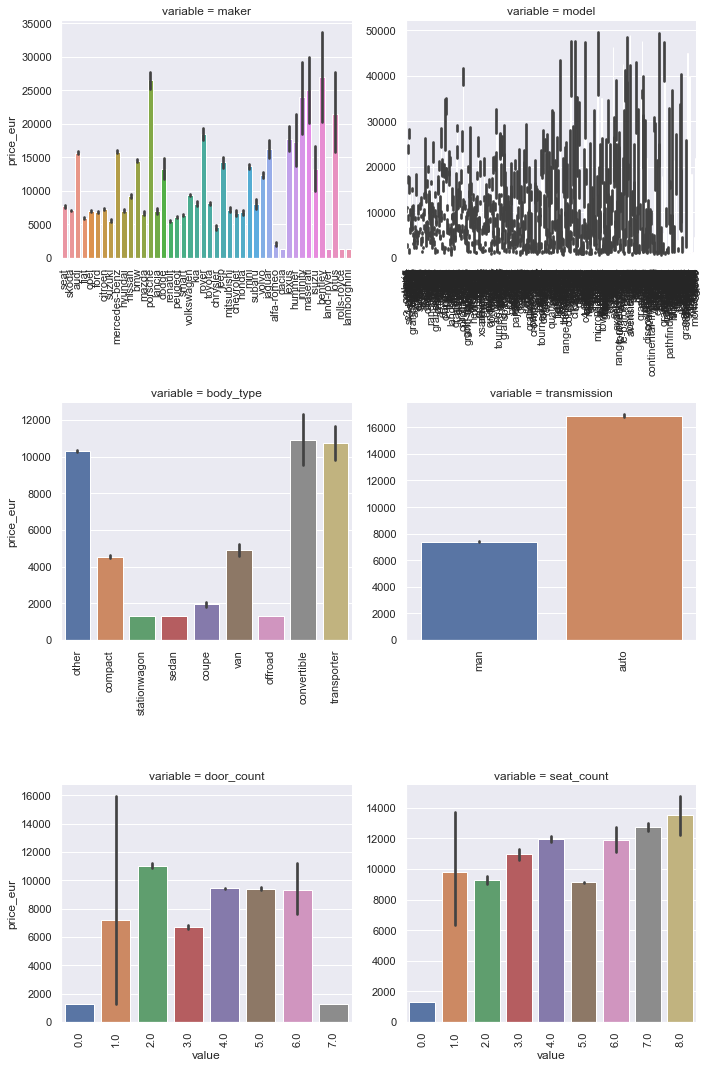

In [48]:
f = pd.melt(new_df, id_vars=['price_eur'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(barplot, "value", "price_eur")

### Trying Anova Analysis

In [49]:
from scipy import stats

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for data in qualitative:
        samples = []
        for val in frame[data].unique():
            s = frame[frame[data] == str(val)]['price_eur'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')


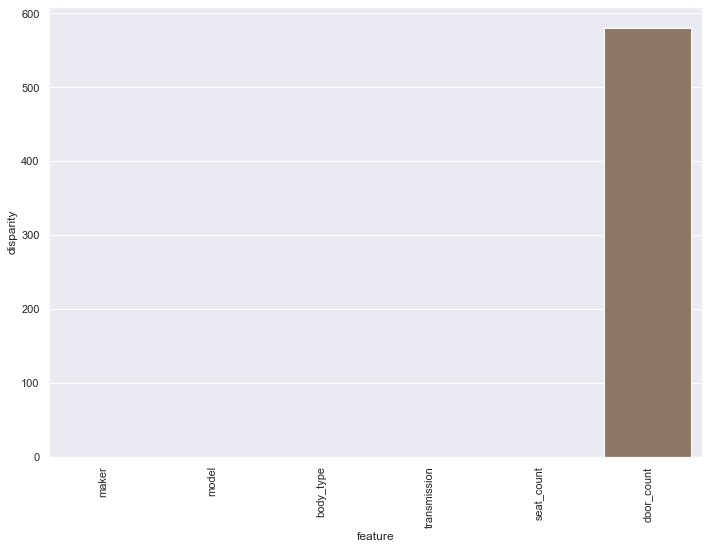

In [50]:
a = anova(new_df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

From anova we can see that only `door_count` influences the price variable.

## Numerical data

In [51]:
new_df['price_eur'].max()

49922.54

In [52]:
# new_df = new_df[(new_df['price_eur'] > 1000) & (new_df['price_eur'] < 4430376)]

In [53]:
new_df['price_eur'].describe()

count    170828.000000
mean       9735.691146
std        9559.666365
min        1000.040000
25%        1600.070000
50%        6624.720000
75%       14526.390000
max       49922.540000
Name: price_eur, dtype: float64

In [54]:
from scipy import stats
# from math import sqrt

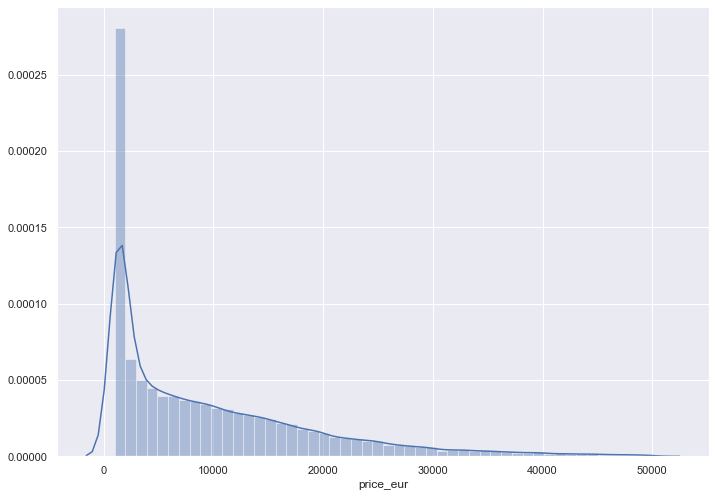

In [55]:
y = new_df['price_eur']

sns.distplot(y)

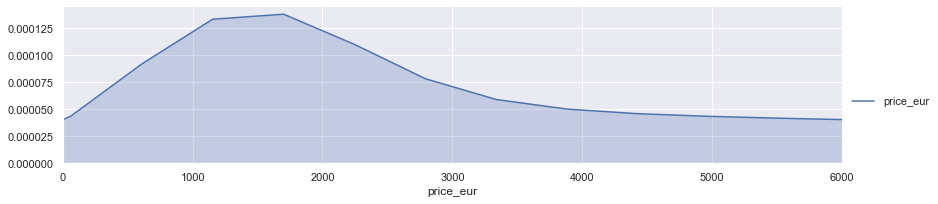

In [56]:
facet = sns.FacetGrid(new_df, aspect=4)
facet.map(sns.kdeplot, 'price_eur', shade=True)
facet.set(xlim=(0, 6000))
facet.add_legend()

In [57]:
# new_y = df[df['price_eur'] > 3000]
# sns.distplot(np.log(new_y['price_eur']))

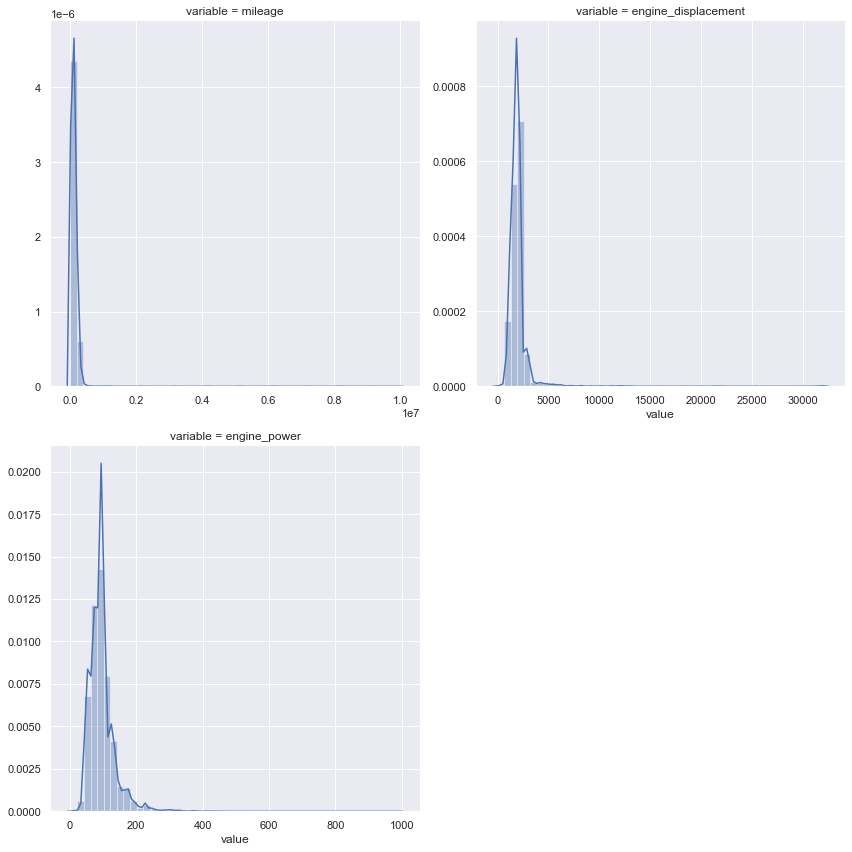

In [58]:
f = pd.melt(new_df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=6)
g = g.map(sns.distplot, "value")

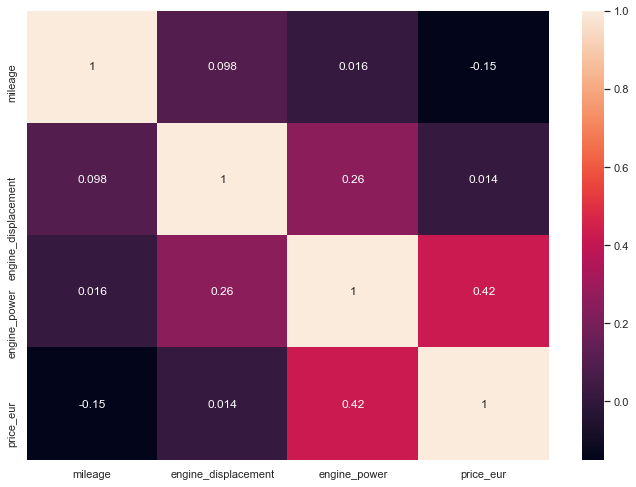

In [59]:
corr = new_df.corr()
sns.heatmap(corr, annot=True)

In [60]:
# def encode(frame, feature):
#     ordering = pd.DataFrame()
#     ordering['val'] = frame[feature].unique()
#     ordering.index = ordering.val
#     ordering['spmean'] = frame[[feature, 'price_eur']].groupby(feature).mean()['price_eur']
#     ordering = ordering.sort_values('spmean')
#     ordering['ordering'] = range(1, ordering.shape[0]+1)
#     ordering = ordering['ordering'].to_dict()
    
#     for cat, o in ordering.items():
#         frame.loc[frame[feature] == cat, feature+'_E'] = o
    
# qual_encoded = []
# for q in qualitative:  
#     encode(new_df, q)
#     qual_encoded.append(q+'_E')
# print(qual_encoded)

In [61]:
# def spearman(frame, features):
#     spr = pd.DataFrame()
#     spr['feature'] = features
#     spr['spearman'] = [frame[f].corr(frame['price_eur'], 'spearman') for f in features]
#     spr = spr.sort_values('spearman')
#     plt.figure(figsize=(6, 0.25*len(features)))
#     sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
# features = quantitative + qual_encoded
# spearman(new_df, features)

# Variable transformations

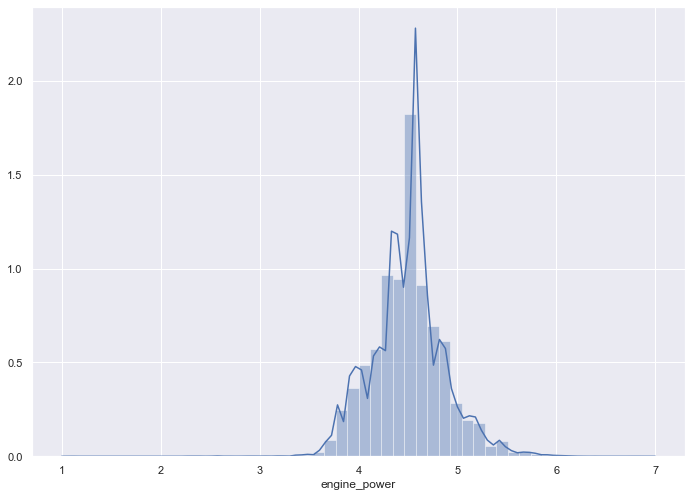

In [62]:
new_df['engine_power'] = np.log(new_df['engine_power'])
sns.distplot(new_df['engine_power'])

In [63]:
new_df = new_df[(new_df['engine_power'] > 3.5) & (new_df['engine_power'] < 5.3)]

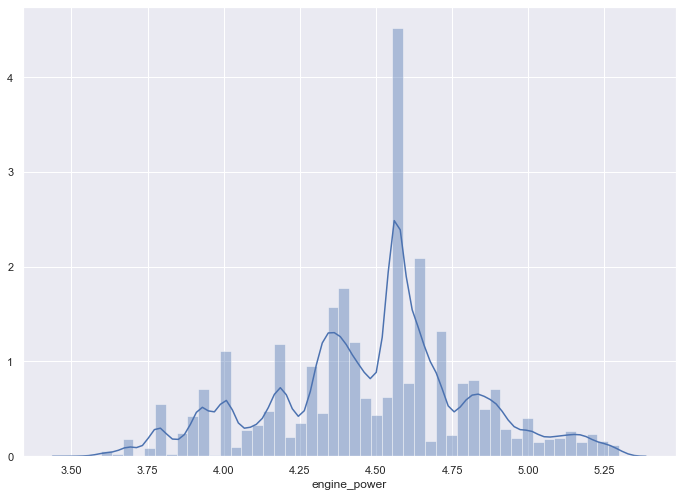

In [64]:
sns.distplot(new_df['engine_power'])

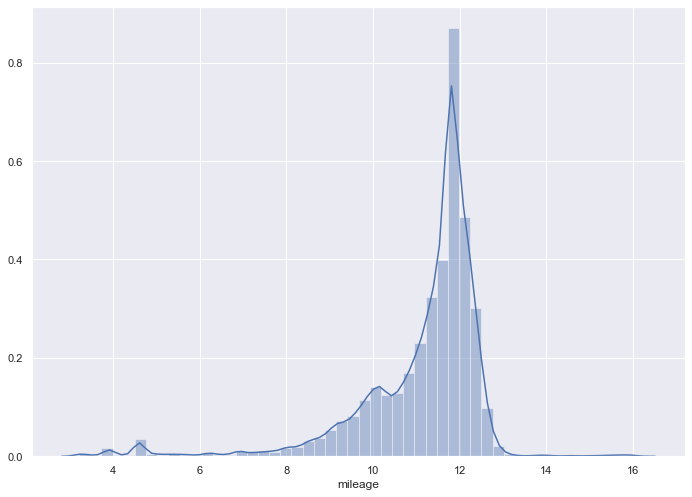

In [65]:
new_df['mileage'] = np.log(new_df['mileage'])
sns.distplot(new_df['mileage'])

In [66]:
new_df = new_df[(new_df['mileage'] > 10) & (new_df['mileage'] < 12.4)]

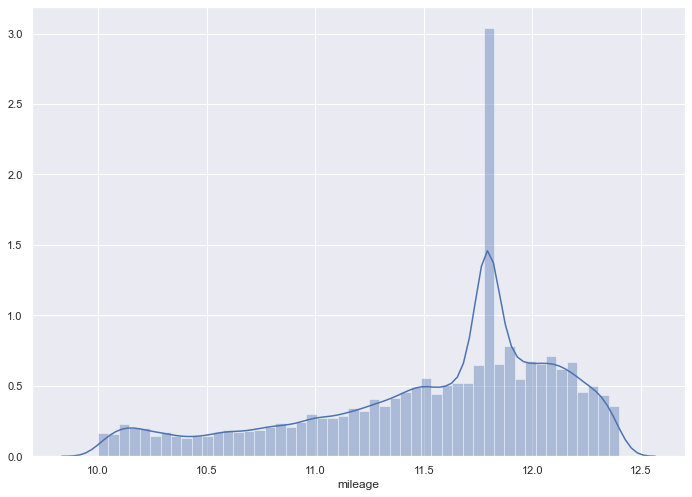

In [67]:
sns.distplot(new_df['mileage'])

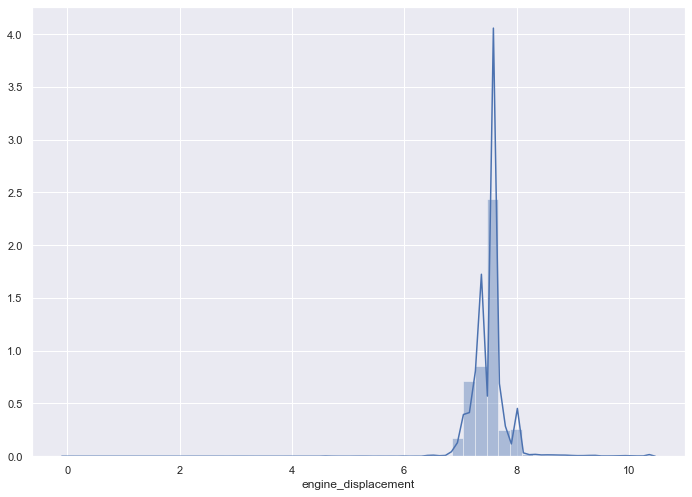

In [68]:
new_df['engine_displacement'] = np.log(new_df['engine_displacement'])
sns.distplot(new_df['engine_displacement'])

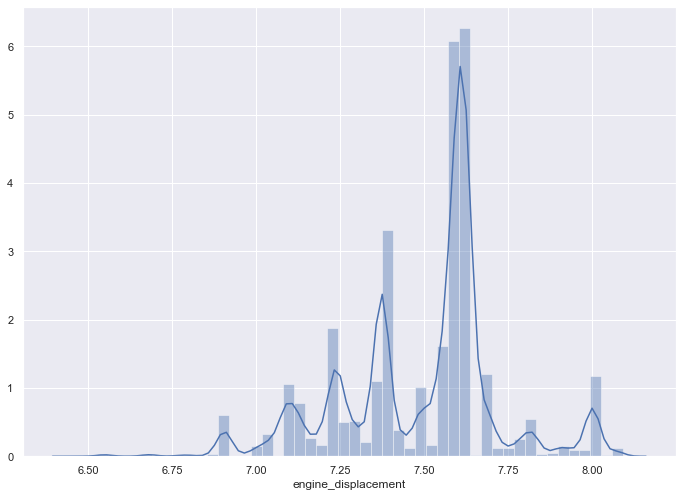

In [69]:
new_df = new_df[(new_df['engine_displacement'] > 6.4) & (new_df['engine_displacement'] < 8.1)]
sns.distplot(new_df['engine_displacement'])

In [70]:
new_df.head()

,maker,model,mileage,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,seat,leon,12.089539,7.237059,4.007333,other,man,4.0,5.0,2500.30
1,skoda,octavia,11.813030,7.046647,4.007333,other,man,4.0,5.0,2980.24
2,audi,octavia,11.835009,7.592870,4.990433,other,man,4.0,5.0,8010.25
3,fiat,punto,11.561716,7.622689,4.564568,other,man,4.0,5.0,2300.26
4,opel,vectra,11.770548,7.622689,4.564568,other,man,4.0,5.0,2800.30


## One-Hot encoding

In [71]:
# clean_df = pd.get_dummies(new_df)

In [ ]:
# clean_df.head()

# Variable creation

In [73]:
# NONE

# Baseline ML Model

In [74]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor

In [75]:
# X = clean_df.drop('price_eur', axis=1)

# y = clean_df['price_eur']

In [76]:
# X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, shuffle=True, random_state=0)

In [77]:
# model = SGDRegressor()

In [78]:
# model.fit(X_train, y_train)

In [79]:
# preds = model.predict(X_test)

In [80]:
# from sklearn.metrics import r2_score

# r2_score(preds, y_test)